In [31]:
import pandas as pd
df = pd.read_csv("salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [33]:
inputs = df.drop('salary_more_then_100k',axis='columns')
target = df['salary_more_then_100k']
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
inputs['company_n'] = le.fit_transform(inputs['company'])
inputs['job_n'] = le.fit_transform(inputs['job'])
inputs['degree_n'] = le.fit_transform(inputs['degree'])

In [35]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [37]:
inputs_n = inputs.drop(['company','job','degree'],axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [39]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [41]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',splitter='best')
model.fit(inputs_n, target)

model.score(inputs_n,target)

1.0

In [43]:
print(model.predict([[2,1,0]]))

[0]


C:\Users\M-Sasmal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [45]:
print(model.predict([[2,1,1]]))

[1]


C:\Users\M-Sasmal\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.4166666666666667, 0.9166666666666666, 'company_n <= 0.5\nentropy = 0.954\nsamples = 16\nvalue = [6, 10]\nclass = no'),
 Text(0.25, 0.75, 'job_n <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]\nclass = yes'),
 Text(0.16666666666666666, 0.5833333333333334, 'degree_n <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = yes'),
 Text(0.08333333333333333, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = yes'),
 Text(0.25, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = no'),
 Text(0.3333333333333333, 0.5833333333333334, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = yes'),
 Text(0.5833333333333334, 0.75, 'company_n <= 1.5\nentropy = 0.811\nsamples = 12\nvalue = [3, 9]\nclass = no'),
 Text(0.5, 0.5833333333333334, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = no'),
 Text(0.6666666666666666, 0.5833333333333334, 'job_n <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]\nclass = yes'),
 Text(0.5833333333333334, 0.4

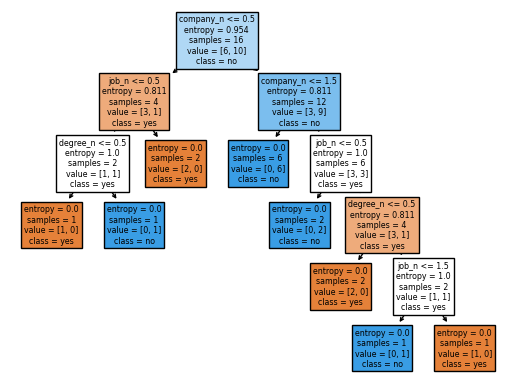

In [47]:
from sklearn import tree
tree.plot_tree(model,feature_names=['company_n','job_n','degree_n'],class_names=['yes','no'],filled=True,impurity=True)